In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_blobs
sns.set()

In [3]:
df=pd.read_csv('train.csv')
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


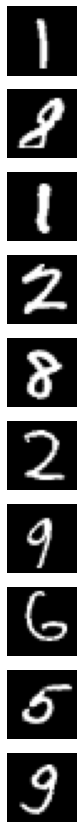

In [5]:
train_data=df.values
x_train=train_data[:,1:]
y_train=train_data[:,0]
rand_idx=np.random.choice(train_data.shape[0],10)
fig,ax=plt.subplots(10,1,figsize=(15,15))
for i in range(len(rand_idx)):
    img_arr=x_train[rand_idx[i],:]
    img_arr=np.uint8(img_arr.reshape(28,28))
    ax[i].imshow(img_arr,cmap="gray")
    ax[i].set_axis_off()
plt.show()


In [20]:
clf=Perceptron()
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
clf.fit(x_train,y_train)
w_ls=clf.coef_

In [21]:
print(w_ls.shape)

(10, 784)


In [28]:
test_data=pd.read_csv('mnist_test.csv').values
test_data

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
x_test=test_data[:,1:]
y_test=test_data[:,0]
x_test=scaler.transform(x_test)
y_pred=clf.predict(x_test)

In [30]:
y_pred

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [31]:
print("Accuracy Score of our multi-class classifier is: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score of our multi-class classifier is: 0.7679


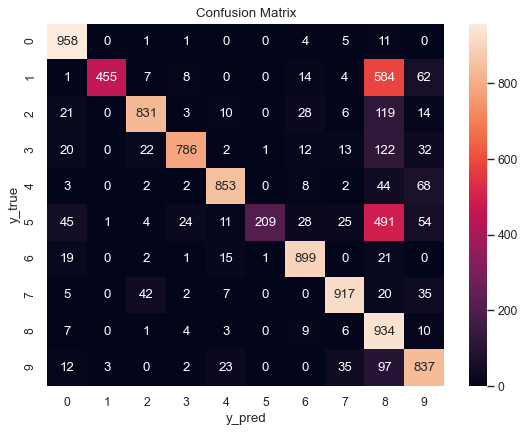

In [32]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6),dpi=80)
sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix")
plt.show()

In [38]:
from numpy import savetxt

In [40]:
savetxt('y_pred.csv',y_pred, delimiter=',')